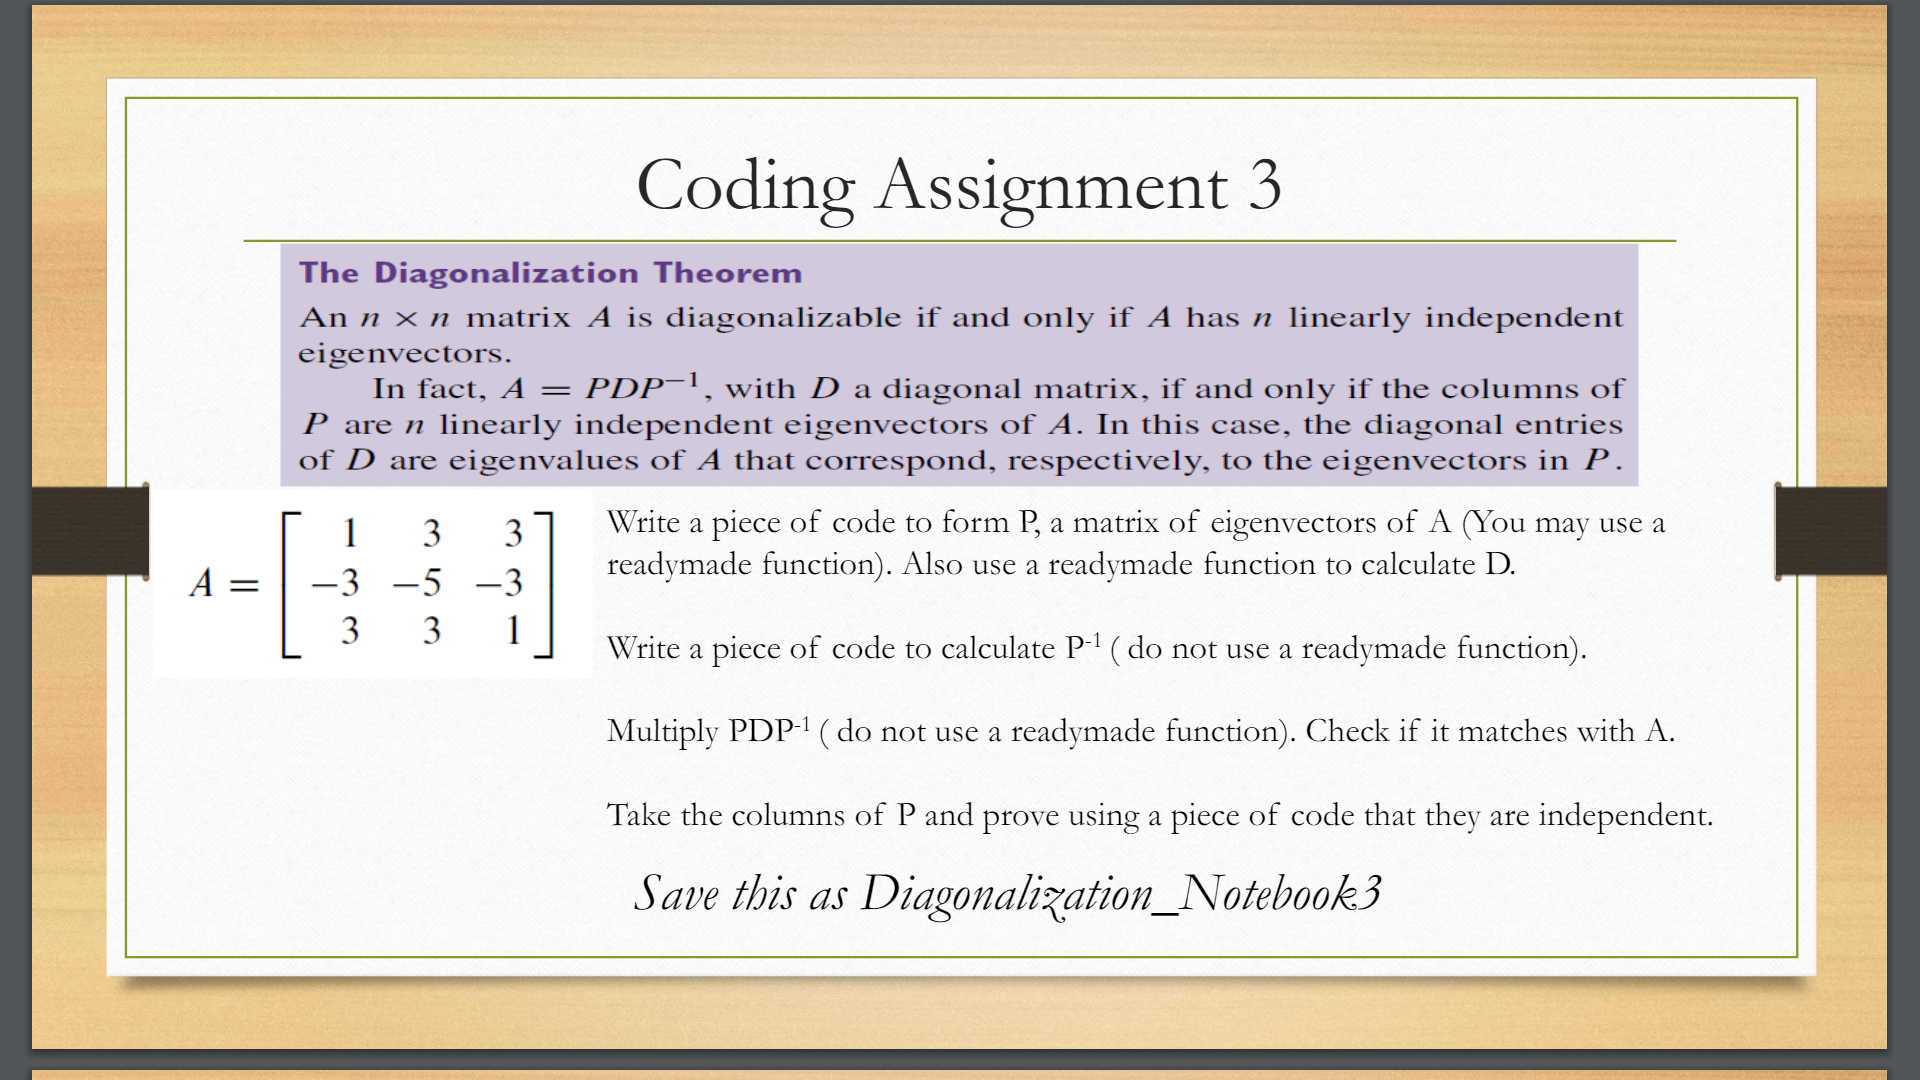

### 1. Import the necessary libraries

In [12]:
import numpy as np 

### 2. Define the necessary functions

#### Define the function to create a zero matrix

In [13]:
def zeroMatrix(rows,columns): 
    # Declare the zero matrix
    zero_matrix = [] 

    # Initialize the zero matrix with zeros 
    for i in range(rows):
        row = [] 
        for j in range(columns):
            element = 0 
            row.append(element)
        zero_matrix.append(row)

    return zero_matrix

#### Define the function to create an identity matrix

In [14]:
def identityMatrix(rows,columns): 
    # Declare the identity matrix
    identity_matrix = [] 

    # initialize the identity matrix
    for i in range(rows):
        row = [] 
        for j in range(columns): 
            if i==j:
                element = 1 
            else:
                element = 0
            row.append(element)
        identity_matrix.append(row)

    return identity_matrix

#### Define the function to create copy of a matrix

In [15]:
def copyMatrix(Matrix,rows,columns): 
    # Declare the copy matrix and initialize it with zeros
    copy_matrix = zeroMatrix(rows,columns) 

    # fill the copy matrix with actual value
    for i in range(rows):
        for j in range(columns): 
            copy_matrix[i][j] = Matrix[i][j] 

    return copy_matrix

#### Define the function to find the inverse of the matrix
##### Approach : Gauss Jordan Elimination method

In [16]:
def inverse(A): 
    
    # Check whether A is a square matrix 
    if len(A)==len(A[0]):
        # Check whether A is a non-singular matrix 
        if np.linalg.det(A)!=0:

            # Make a copy of Matrix A 
            A_copy = copyMatrix(A,len(A),len(A[0]))
            
            # Create an identity matrix 
            I = identityMatrix(len(A),len(A[0]))
            # Make a copy of Matrix I
            I_copy = copyMatrix(I,len(I),len(I[0]))

            # Perform the gauss jordan elimination 
            indices = list(range(len(A_copy)))

            for fd in range(len(A_copy)): 
                
                # Ckeck whether the first element of the row is zero 
                if A_copy[fd][fd] == 0: 
                    # Replace that row with a row that has a non-zero element 
                    for i in range(fd+1,len(A_copy)): 
                        if A_copy[i][fd] != 0: 
                            A_copy[fd], A_copy[i] = A_copy[i], A_copy[fd]
                            # repeat the operation done on A_copy for I_copy
                            I_copy[fd], I_copy[i] = I_copy[i], I_copy[fd]
                            break

                # find the scaling factor that makes the first element 1
                fdscalar = 1/A_copy[fd][fd]
                #scale the entire row
                for j in range(len(A_copy)):
                    A_copy[fd][j] *= fdscalar
                    I_copy[fd][j] *= fdscalar

                # find the scaling factor to perform reduction
                for i in indices[0:fd] + indices[fd+1:]: 
                    crScaler = A_copy[i][fd]
                    
                    for j in range(len(A_copy)):
                        A_copy[i][j] = A_copy[i][j] - crScaler * A_copy[fd][j]
                        I_copy[i][j] = I_copy[i][j] - crScaler * I_copy[fd][j] 
                        
            return I_copy,A_copy # I_copy contains the inverse of the given matrix
                                 # A_copy contains the reduced row echelon form of the given matrix
        
        # Display error message for singlar matrix
        else:
            print('\nInverse exists only for non-singular matrix.The provided matrix is a singular matrix')
        
    # Display error message for square matrix    
    else:
        print('\nInverse exists only for square matrix.The matrix provided is not a square matrix')


#### Define the function to find the matrices P, D and P<sup>-1</sup>

In [17]:
def diagonalize(A): 
    # Find the eigenvalues and the eigenvectors 
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Find matrix P 
    P = eigenvectors 
    
    # Find matrix D 
    D = np.diag(eigenvalues)

    # Find matrix P_inv 
    P_inv,P_after_reduced_row_echelon = inverse(P)
    
    return P, D, P_inv,P_after_reduced_row_echelon

#### Define the function to perform matrix multiplication

In [18]:
def matrix_multiply(A,B): 
    # Check whether column of the first matrix is equal to the row of the second matrix
    if len(A[0])==len(B):
        # initialize the resultant matrix with zeros
        result = zeroMatrix(len(A),len(B[0])) 
        # write logic to perform matrix multiplication
        for i in range(len(A)): 
            for j in range(len(B[0])): 
                for k in range(len(B)): 
                    result[i][j]+=A[i][k]*B[k][j]
                              
        return result
        
    # Display the error message
    else:
        print('\nColumn of the first matrix should be equal to the row of the second matrix')

### 3.Define the Matrix A

In [19]:
A = np.array([
    [1,3,3],
    [-3,-5,-3], 
    [3,3,1]
])
print(A)

[[ 1  3  3]
 [-3 -5 -3]
 [ 3  3  1]]


### 4.Find P, D and P<sup>-1</sup>

In [20]:
# Perform diagonalization 
P, D, P_inv, P_after_reduced_row_echelon = diagonalize(A)

# Display P, D, P_inv
print('\nMatrix P\n',P)
print('\nMatrix D\n',D)
print('\nMatrix P_inv\n',P_inv)


Matrix P
 [[ 5.77350269e-01 -1.28197512e-16 -6.72654054e-01]
 [-5.77350269e-01 -7.07106781e-01  7.37141689e-01]
 [ 5.77350269e-01  7.07106781e-01 -6.44876349e-02]]

Matrix D
 [[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]

Matrix P_inv
 [[1.7320508075688767, 1.7320508075688767, 1.732050807568877], [-1.4142135623730947, -1.2786322968212513, 0.13558126555184355], [0.0, 1.48664829200311, 1.48664829200311]]


### 5.Check whether matrix A is equal to PDP<sup>-1</sup>

In [21]:
# Display the matrix A 
print('\n Matrix A \n')
for i in range(len(A)):
    for j in range(len(A[0])): 
        print(f'{(float)(round(A[i][j],1))}\t',end=' ')
    print('\n')

# calculate P x D 
PD = matrix_multiply(P,D)

# calculate PD x P_inv
PDP_inv = matrix_multiply(PD,P_inv)

# Display the matrix PDP_inv
print('\n Matrix PDP_inv \n')
for i in range(len(PDP_inv)):
    for j in range(len(PDP_inv[0])): 
        print(f'{round(PDP_inv[i][j],1)}\t',end=' ')
    print('\n')


 Matrix A 

1.0	 3.0	 3.0	 

-3.0	 -5.0	 -3.0	 

3.0	 3.0	 1.0	 


 Matrix PDP_inv 

1.0	 3.0	 3.0	 

-3.0	 -5.0	 -3.0	 

3.0	 3.0	 1.0	 



**Conclusion**</br>
From the above its clear that A = PDP<sup>-1</sup>

### 6.Check whether Matrix P is linearly independent

In [22]:
# Display Matrix P 
print('\nMatrix P\n')
for i in range(len(P)):
    for j in range(len(P[0])): 
        print(f'{round(P[i][j],1)}\t',end=' ')
    print('\n')

# Display Matrix P after reduced row echolen method
print('\nMatrix P after reduced row echolen method\n')
for i in range(len(P_after_reduced_row_echelon)):
    for j in range(len(P_after_reduced_row_echelon[0])): 
        print(f'{round(P_after_reduced_row_echelon[i][j],1)}\t',end=' ')
    print('\n')


Matrix P

0.6	 -0.0	 -0.7	 

-0.6	 -0.7	 0.7	 

0.6	 0.7	 -0.1	 


Matrix P after reduced row echolen method

1.0	 0.0	 -0.0	 

0.0	 1.0	 -0.0	 

0.0	 0.0	 1.0	 



**Conclusion**</br> 
    For a matrix,after reduced row echolen method `(RREF)` if all the `pivot elements` are `non-zero`,then we can say that the matrix is `linearly independent`.Therefore,from the above its clear that P is a linearly independent matrix.
 